# WELCOME to this guided project "Multi-Class Classification" on Coursera Labs! 😁 
#### This project course is part of "Tensorflow for Convolutional Neural Network" Series of project courses on Coursera.<br/><br/>

In this project, we will start coding, and we will go through 5 tasks:<br/> <br/>

👉🏻 **Task 1**: Introduction and Overview of the project. <br/><br/>
👉🏻 **Task 2**: Import Libraries and Select the Module. <br/><br/>
👉🏻 **Task 3**: Setup the dataset with Augmentation. <br/><br/>
👉🏻 **Task 4**: Train the model and Visualize Results. <br/><br/>
👉🏻 **Task 5**: Test the model on Validation Data. <br/><br/>

## 👉🏻 Task 1: Introduction and Overview of the Project

This guided project demonstrates how to build a Keras model for classifying five species of flowers by using a pre-trained TF2 SavedModel from TensorFlow Hub for image feature extraction, trained on the much larger and more general ImageNet dataset.<br/> Optionally, the feature extractor can be trained ("fine-tuned") alongside the newly added classifier. ⭐
<br/>

We are using a pretrained model for our multi-class classification project because Image classification models have millions of parameters.🖼<br/>
And Training them from scratch requires a lot of labeled training data and a lot of computing power.🗜<br/>
So, we will apply Transfer learning which is a technique that shortcuts much of this by taking a piece of a model that has already been trained on a related task and reusing it in a new model.⚙<br/>


At the end of this project, you will try out a Bonus Exercise! 🤩

## 👉🏻 Task 2: Import Libraries and Select the Module

### ⭐Import the Libraries

In [1]:
!pip install tensorflow_hub

In [2]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

TF version: 1.14.0
Hub version: 0.9.0
GPU is NOT AVAILABLE


C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

### ⭐Download the classifier Select the TF2 SavedModel module to use

In [3]:
module_selection = ("mobilenet_v2_100_224", 224) 
handle_base, pixels = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))

BATCH_SIZE = 32 #@param {type:"integer"}

Using https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4 with input size (224, 224)


## 👉🏻 Task 3: Setup the dataset with Augmentation

<br/>

### ⭐ Inputs are suitably resized for the selected module 🔢 <br/>
Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, especially when fine-tuning.

In [4]:
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [5]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = False 
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range= 40, #
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range= 0.2,
      shear_range=0.2, zoom_range= 0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 731 images belonging to 5 classes.
Found 2939 images belonging to 5 classes.


### ⭐Download the classifier Select the TF2 SavedModel module to use

All it takes is to put a linear classifier on top of the `feature_extractor_layer` with the Hub module. 🔗
<br/>
For speed ✈, we start out with a non-trainable `feature_extractor_layer`, but you can also enable fine-tuning for greater accuracy.

In [6]:
do_fine_tuning = False #@param {type:"boolean"}

In [7]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate= 0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


## 👉🏻 Task 4: Train the model and Visualize Results

In [8]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr= 0.05,
                                    momentum= 0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [9]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs= 5, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history

Epoch 1/5
91/91 [==============================] - 250s 3s/step - loss: 1.6370 - acc: 0.7372 - val_loss: 1.9755 - val_acc: 0.7173
Epoch 2/5
91/91 [==============================] - 248s 3s/step - loss: 1.9260 - acc: 0.7994 - val_loss: 1.7642 - val_acc: 0.7713
Epoch 3/5
91/91 [==============================] - 248s 3s/step - loss: 1.6149 - acc: 0.8136 - val_loss: 1.9516 - val_acc: 0.7528
Epoch 4/5
91/91 [==============================] - 249s 3s/step - loss: 1.6297 - acc: 0.8266 - val_loss: 1.4854 - val_acc: 0.8210
Epoch 5/5
91/91 [==============================] - 250s 3s/step - loss: 1.4856 - acc: 0.8397 - val_loss: 1.4838 - val_acc: 0.8210


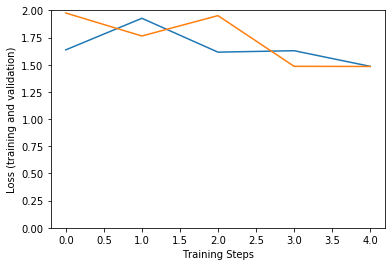

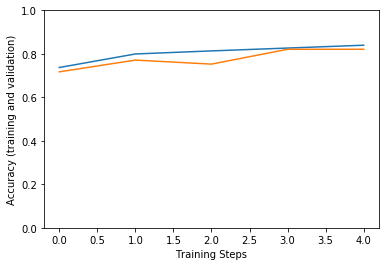

In [14]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

## 👉 Task 5: Test the model on Validation Data

<br/>

Try out the model on an image from the validation data: 🖼

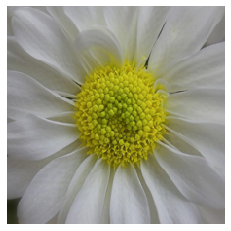

True label: daisy
Predicted label: daisy


In [12]:
def get_class_string_from_index(index):
   for class_string, class_index in valid_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(valid_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

🏁Finally, the trained model can be saved for deployment to TF Serving or TF Lite (on mobile) as follows.

In [13]:
saved_model_path = "/tmp/saved_flowers_model"
tf.saved_model.save(model, saved_model_path)

ValueError: None values not supported.

## Bonus: Extra Exercise!
_Refresh Your Memory..._ 😋

1) How many types of Tensors are there? 🤔
<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .
Answer: 👉🏻There are **three types** 3️⃣ of Tensors used to create neural network models.<br/><br/><br/>
2) Do you know what are they?? 🤔
<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.<br/>.
Answer: <br/> ➡**Constant Tensor** <br/>
Constant Tensors are used as constants, as the name suggests. They create a node that takes a value and does not change it. A constant can be created using tf.constant.<br/>
*tf.constant*(value, dtype=None, shape=None, name='Const', verify_shape=False)
It accepts the five arguments.
<br/><br/>
➡**Variable Tensor**<br/>
Variable Tensors are the nodes which provide their current value as output. It means that they can retain their value over multiple executions of a graph.
<br/><br/>
➡**Place Holder Tensor**<br/>
Placeholders Tensors are essential than variables. These are used to assign data in a later time. Placeholders are the nodes whose value is fed at the time of execution. Assume, we have inputs to our network which are dependent on some external data. Also, we do not want our graph to depend on any real value while developing the graph, then Placeholders are useful datatype. We can even build a graph without any data.
Therefore, placeholders do not require any initial value. They only need a datatype (such as float32) and a tensor shape, so the graph still knows what to compute with even though it does not have any stored values.

# CONGRATULATIONS! 🤩